# Dataset statistics by class

## Libraries and methods

In [1]:
#libraries
from google.colab import drive
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#method used to preprocess the dataset in order to plot it
#in particolar, it applies a particular order on one of a dataset label, select the features to be visualized and the number of rows

def get_df_for_plot(df, orderby, otherlabel, feature): 

  #ordering plot_df by the values of one label
  df = pd.concat([df.loc[df['label'] == orderby].sort_values(['value'], ascending=False).reset_index(drop=True), 
                        df.loc[df['label'] == otherlabel]], ignore_index=True)
  
  #selecting the features that need to be visualised together
  a = df.loc[df['feature'].isin(eval(col_names.loc[0, feature]))]

  #selecting the first 10 rows (they all have the same label)
  first_rows = a.iloc[:10]

  #selecting the rows that has the same features as the first 10 (now we consider both labels)
  a = a.loc[a["feature"].isin(first_rows["feature"])]

  return a

In [3]:
#method used to plot the distributions of particular features

def feature_plot(df, feature): 
  plt.figure(figsize=(10,6))
  sns.set_theme(style="whitegrid")
  sns.barplot(x='feature', y="value", hue = 'label', data = df, palette=sns.color_palette("husl", 2))
  plt.xticks(rotation=30, ha="right")
  plt.title('Class distribution over a particular feature')
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.show()

## Import of data 
The imported data consists in: 
- `data`: a dataset obtained after a preprocessing step made in "Baseline Text Classification".
- `col_names`: a dataset obtained saving features names in "Baseline Text Classification".

In [4]:
#import of the processed dataset and the columns' names
from_drive = True

if from_drive == True: 
  drive.mount("/content/gdrive")
  path = "/content/gdrive/MyDrive/Magistrale/Stage"
  data = pd.read_csv(path + "/preprocessed_dataset.csv")
  col_names = pd.read_csv(path + "/columns_names.csv")
else: 
  data = pd.read_csv('/content/preprocessed_dataset.csv', )
  col_names = pd.read_csv('/content/columns_names.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
print(data.shape)
print(data.columns)

(2496, 9621)
Index(['Unnamed: 0', 'Label', 'text', 'text_clean', 'Clinical Trial',
       'Controlled Clinical Trial', 'Journal Article',
       'Research Support, Non-U.S. Gov't', 'Randomized Controlled Trial',
       'Research Support, U.S. Gov't, P.H.S.',
       ...
       'journal_title_abbreviation_Vasa',
       'journal_title_abbreviation_Virchows Arch',
       'journal_title_abbreviation_West Afr J Med',
       'journal_title_abbreviation_West J Med',
       'journal_title_abbreviation_Wien Klin Wochenschr',
       'journal_title_abbreviation_Wien Med Wochenschr',
       'journal_title_abbreviation_Wilderness Environ Med',
       'journal_title_abbreviation_Yonsei Med J',
       'journal_title_abbreviation_Z Gerontol Geriatr',
       'journal_title_abbreviation_Z Kardiol'],
      dtype='object', length=9621)


In [6]:
col_names.columns

Index(['publication_type', 'authors', 'ace', 'ace_inhibitors',
       'publication_date', 'publication_place', 'journal_title'],
      dtype='object')

## Dataset with statistics by class

In [7]:
#dataset with Label == 0

df0 = data.loc[data["Label"] == 0, ~data.columns.isin(["Unnamed: 0", "text", "text_clean"])] #removing index, text, text_clean
df0 = pd.DataFrame(df0.sum(axis=0).astype(int)).T
#normalization of frequency counts
df0 = df0/ len(data[data["Label"] == 0])
df0["Dataset"] = "Ace inhibitors"

In [8]:
#dataset with Label == 1

df1 = data.loc[data["Label"] == 1, ~data.columns.isin(["Unnamed: 0", "text", "text_clean"])] #removing index, text, text_clean
df1 = pd.DataFrame(df1.sum(axis=0).astype(int)).T
#normalization of frequency counts
df1 = df1/ len(data[data["Label"] == 1])
df1["Label"] = 1
df1["Dataset"] = "Ace inhibitors"

The normalization of the absolute frequencies was made dividing the value of each observation by the total number of observations with the same label as the considered one.
- 0: the frequency for that class was zero.
- 1: the frequency for that class was equal to the number of obeservation for that class (every obeservation of that class presented that feature).

In [9]:
#dataset with statistics by class

df = pd.concat([df0, df1], ignore_index = True)
pd.set_option('display.max_columns', None)
display(df.head())

,Label,Clinical Trial,Controlled Clinical Trial,Journal Article,"Research Support, Non-U.S. Gov't",Randomized Controlled Trial,"Research Support, U.S. Gov't, P.H.S.",Review,Comparative Study,Multicenter Study,Case Reports,Congress,News,Comment,Letter,Meta-Analysis,"Research Support, U.S. Gov't, Non-P.H.S.","Clinical Trial, Phase II",Clinical Conference,Editorial,"Clinical Trial, Phase III",Evaluation Study,Guideline,Practice Guideline,English Abstract,"Clinical Trial, Phase I",Validation Study,Systematic Review,Retracted Publication,"Nazzaro, P","Manzari, M","Merlo, M","Triggiani, R","Scarano, A","Ciancio, L","Pirrelli, A","Levy, M","Azaz-Livshits, T","Sadan, B","Shalit, M","Geisslinger, G","Brune, K","Ruggenenti, P","Mosconi, L","Sangalli, F","Casiraghi, F","Gambara, V","Remuzzi, G","Remuzzi, A","Soma, J","Aakhus, S","Dahl, K","Wideroe, T E","Skjaerpe, T","Dries, D L","Exner, D V","Gersh, B J","Cooper, H A","Carson, P E","Domanski, M J","Karakayli, G","Beckham, G","Orengo, I","Rosen, T","Hansson, L","Lindholm, L H","Niskanen, L","Lanke, J","Hedner, T","Niklason, A","Luomanmaki, K","Dahlof, B","de Faire, U","Morlin, C","Karlberg, B E","Wester, P O","Bjorck, J E","Tomiyama, H","Nakayama, T","Watanabe, G","Shiojima, K","Sakuma, Y","Yamamoto, A","Imai, Y","Yoshida, H","Doba, N","Martina, B","Frach, B","Surber, C","Drewe, J","Battegay, E","Gasser, P","Hamroff, G","Katz, S D","Mancini, D","Blaufarb, I","Bijou, R","Patel, R","Jondeau, G","Olivari, M T","Thomas, S","Le Jemtel, T H","Tuomilehto, J","Rastenyte, D","Birkenhager, W H","Thijs, L","Antikainen, R","Bulpitt, C J","Fletcher, A E","Forette, F","Goldhaber, A","Palatini, P","Sarti, C","Fagard, R","Prisant, L M","Neutel, J M","Ferdinand, K","Papademetriou, V","DeQuattro, V","Hall, W D","Weir, M R","Kano, Y","Kokaji, T","Shiohara, T","Lins, L E","Hermansson, K","Ferguson, J J","Bartels, G L","van den Heuvel, F M","van Veldhuisen, D J","van der Ent, M","Remme, W J","Mackay, F J","Pearce, G L","Mann, R D","Cashin-Hemphill, L","Holmvang, G","Chan, R C","Pitt, B","Dinsmore, R E","Lees, R S","Dickstein, K","Kjekshus, J","Buemi, M","Allegra, A","Corica, F","Aloisi, C","Ruello, A","Giacobbe, M S","Di Pasquale, G","Senatore, M","Frisina, N","Manche, A","Galea, J","Busuttil, W","Dossegger, L","Neiss, A","Nielsen, T","Viergutz, S","Kjoller, E","Kober, L","Jorgensen, S","Torp-Pedersen, C","Pahor, M","Tatti, P","Borkowf, C B","Geller, N L","Rosenberg, Y","Pfeffer, M A","Hausberg, M","Barenbrock, M","Hohage, H","Muller, S","Heidenreich, S","Rahn, K H","Stanek, B","Frey, B","Berger, R","Hartter, E","Pacher, R","Livni, E","Lapidoth, M","Halevy, S","Coletta, C","Ricci, R","Ceci, V","Seccareccia, F","Rulli, F","Mazzuca, V","Putini, R L","Salustri, A","Bottero, G","Pasquale, M","Soeki, T","Tamura, Y","Bandou, K","Tanaka, H","Takeichi, N","Shinohara, H","Yui, Y","Fukuda, N","Sui, O","Lakshman, M R","Reda, D J","Materson, B J","Cushman, W C","Freis, E D","Radevski, I","Skudicky, D","Candy, G","Sathekge, S","Strugo, V","Sareli, P","Gasic, S","Wagner, O F","Fasching, P","Ludwig, C","Veitl, M","Kapiotis, S","Jilma, B","Horiuchi, Y","Matsuda, M","Waclawiw, M A","Shelton, B","Mitchell, G F","Norman, J E","Van de Wiele, C","Brans, B","Vanholder, R","Hoeben, H","Van Laere, K","Dierckx, R A","Rich, M W","Ostman, J","Asplund, K","Bystedt, T","Jern, S","Kjellstrom, T","Lithell, H","Tarnow, L","Sato, A","Ali, S","Rossing, P","Nielsen, F S","Parving, H H","Acanfora, D","Lowenthal, D T","Furgi, G","Trojano, L","Picone, C","Nicolino, A","Iannuzzi, G L","Papa, A","Rengo, F","Benatar, D","Hall, V","Reddy, S","Gheorghiade, M","Nagy, L","Tarjan, J","Samoczi, M","Kovacs, I","Takacs, J","Swedberg, K","Snapinn, S","Gasowski, J","Staessen, J A","Celis, H","Fagard, R H","Arabidze, G G","de Leeuw, P","Dollery, C T","Duggan, J","Kawecka-Jaszcz, K","Leonetti, G","Nachev, C","Safar, M","Rodico, J L","Rosenfeld, J","Seux, M L","Webster, J","Yodfat, Y","Bailey, B","Carney, S L","Gillies, A A","Smith, A J","Zhang, X","Hense, H W"

## Distribution plots

In [10]:
#rearrenge the dataset in order to plot it -> creation of plot_df

x = df0.T
x["feature"] = x.index
x["label"] = 0

y = df1.T
y["feature"] = x.index
y["label"] = 1

plot_df = pd.concat([x, y], axis=0)
plot_df.rename(columns={0 : "value"}, inplace=True)
plot_df = plot_df.reset_index(drop=True)
plot_df = plot_df.loc[plot_df["feature"] != "Dataset"]

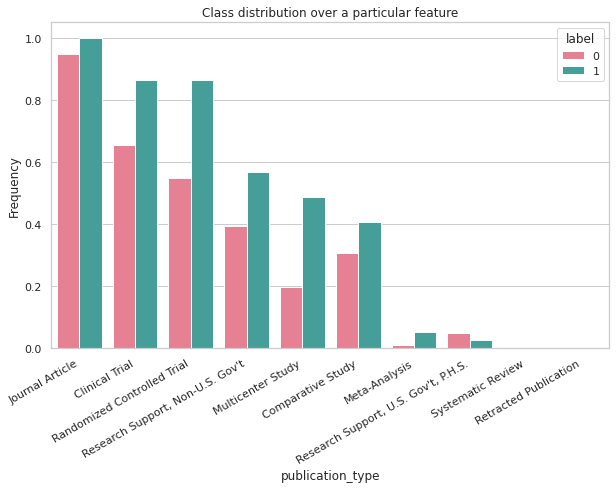

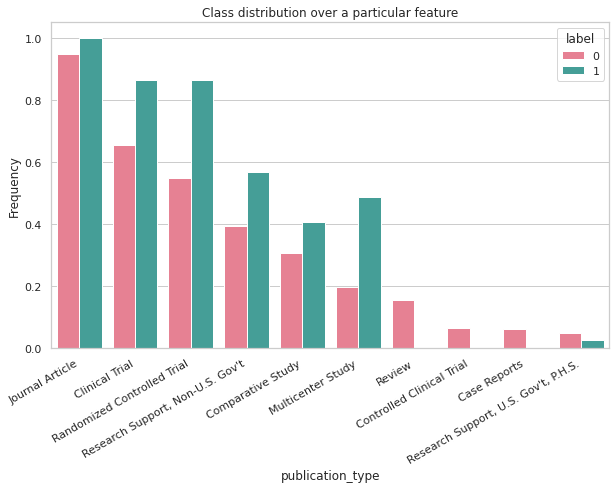

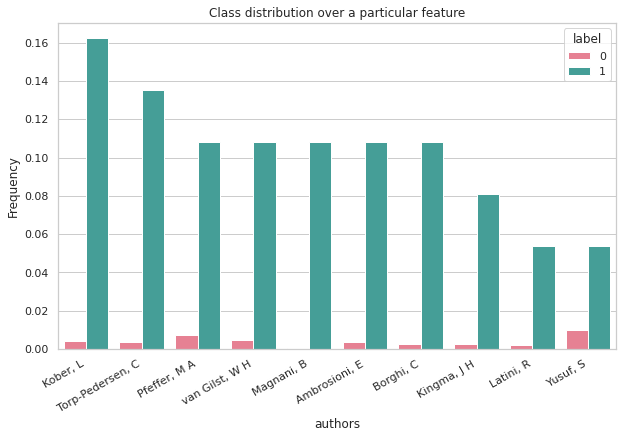

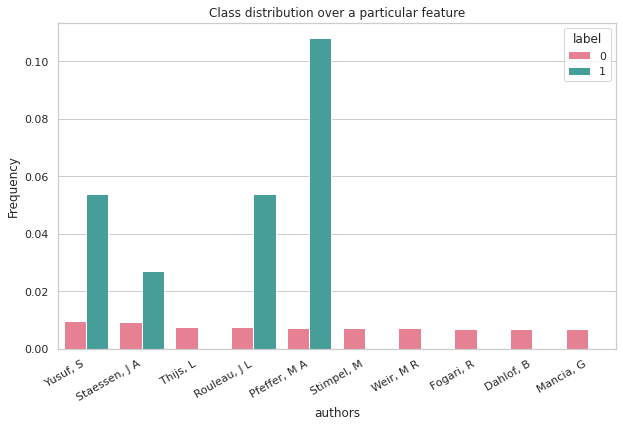

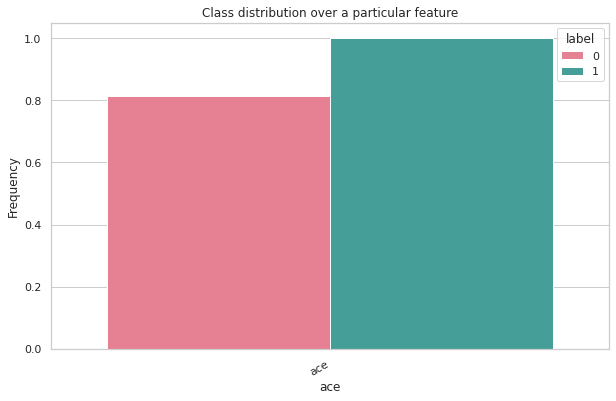

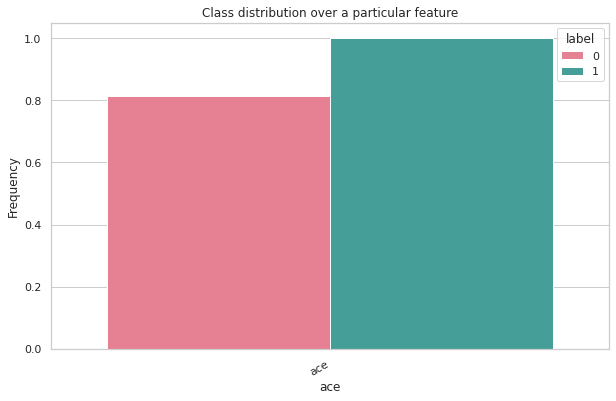

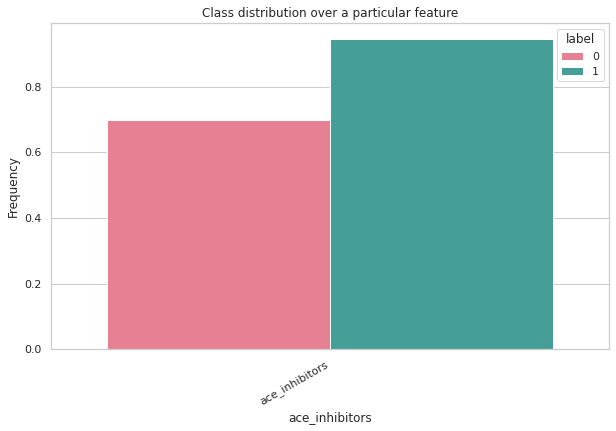

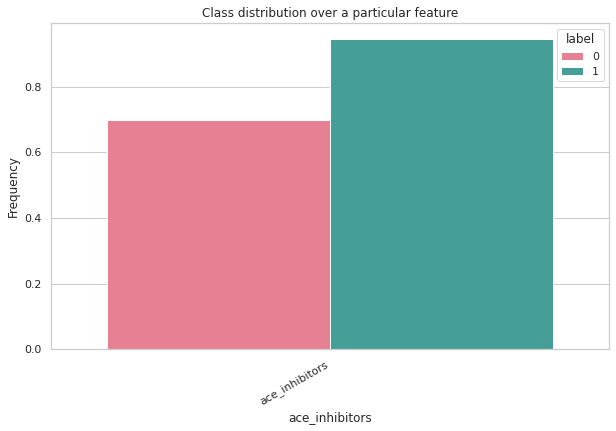

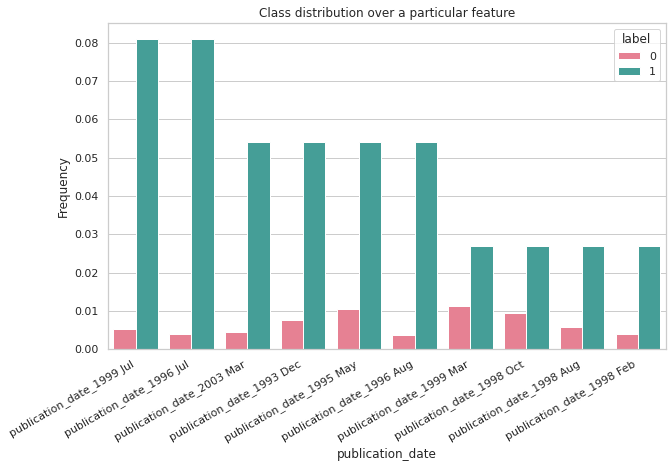

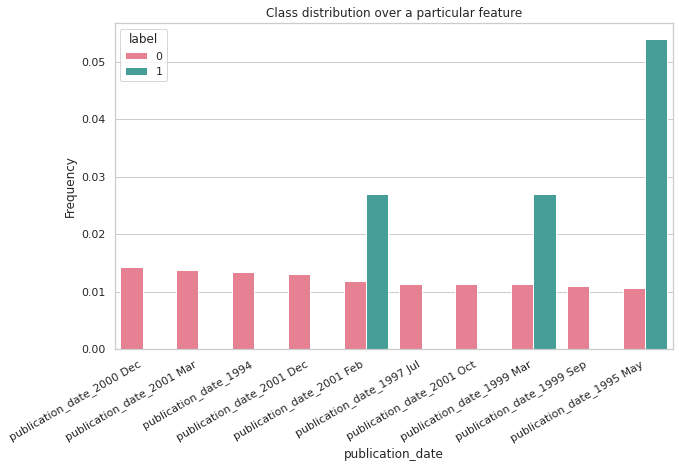

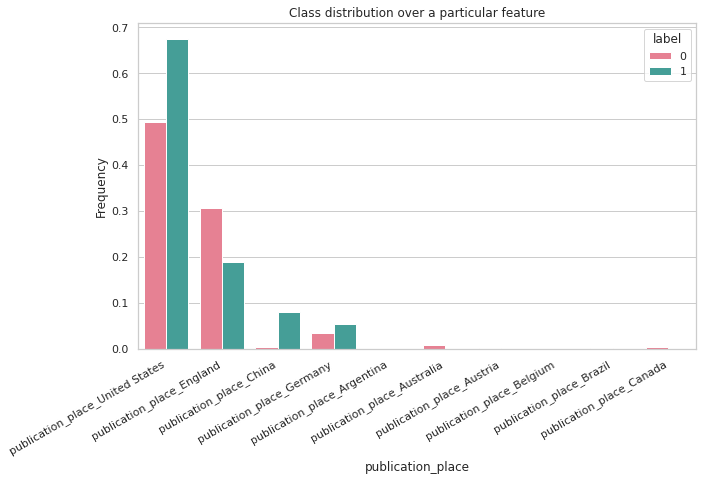

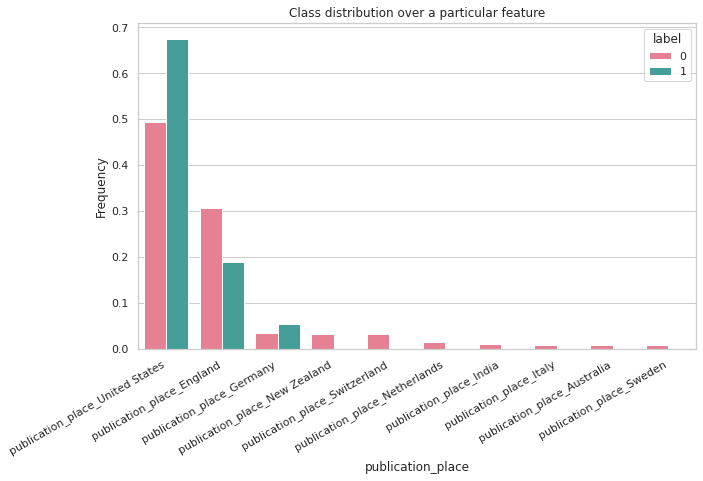

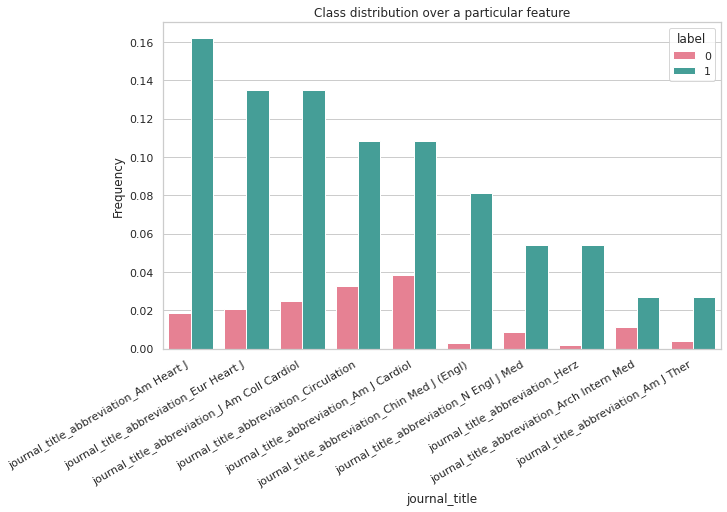

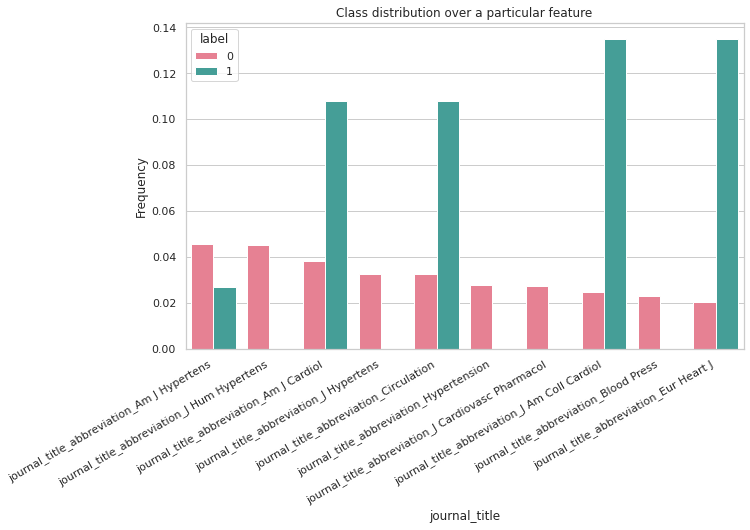

In [11]:
#plotting class distribution over every group of features
for i in col_names.columns: 

  #ordering by label 1
  a = get_df_for_plot(df=plot_df, orderby=1, otherlabel=0, feature=i)
  feature_plot(a, i)

  #ordering by label 0
  a = get_df_for_plot(df=plot_df, orderby=0, otherlabel=1, feature=i)
  feature_plot(a, i)